In [1]:
## loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load the dataset into python environment 

In [2]:
df1=pd.read_csv("titanic_dataset.csv")

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## basic statistical overview of the dataset
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
len(df1)

891

In [6]:
df1['PassengerId'].nunique()

891

##### There are total 891 rows and there are 891 unique PassengerId , so making PassengerId as index

#### 2. Make ‘PassengerId’ as the index column 

In [7]:
df1.set_index(['PassengerId'], inplace = True)

In [8]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 3. Check the basic details of the dataset

In [10]:
df1['Name'].nunique()

891

#### There are 891 unique names, so 'Name' column does not help if we are building a model.

In [11]:
## checking null values
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

1. Age, Cabin, Embarked have null values.
2. Cabin have 77% null values

In [12]:
## checking the data types
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
## checking the values of 'Survived' column
df1['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [14]:
print(round(((549/891)*100),2),'%',"people onboard lost their lives.")

61.62 % people onboard lost their lives.


In [15]:
## checking for values in 'Sex', if there exist any error data or not.
df1['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

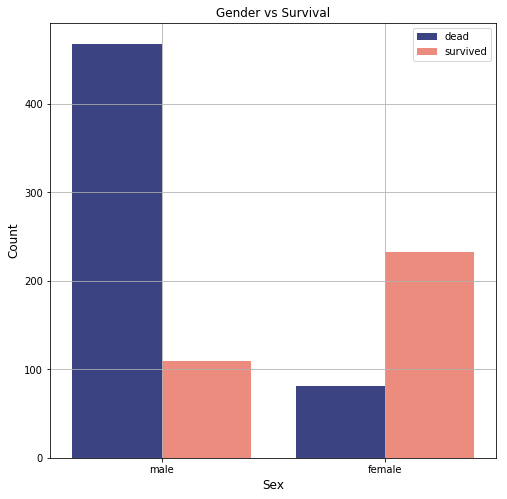

In [16]:
## gender vs survival graph
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Sex',hue='Survived',data=df1,palette=['#2F3A8F','#FE7E6D'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['dead','survived'],bbox_to_anchor=(1,1))
plt.xlabel("Sex",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Gender vs Survival")
plt.grid()

1. Most of the men didnt survived whereas most women survived.
2. Most Females were saved.

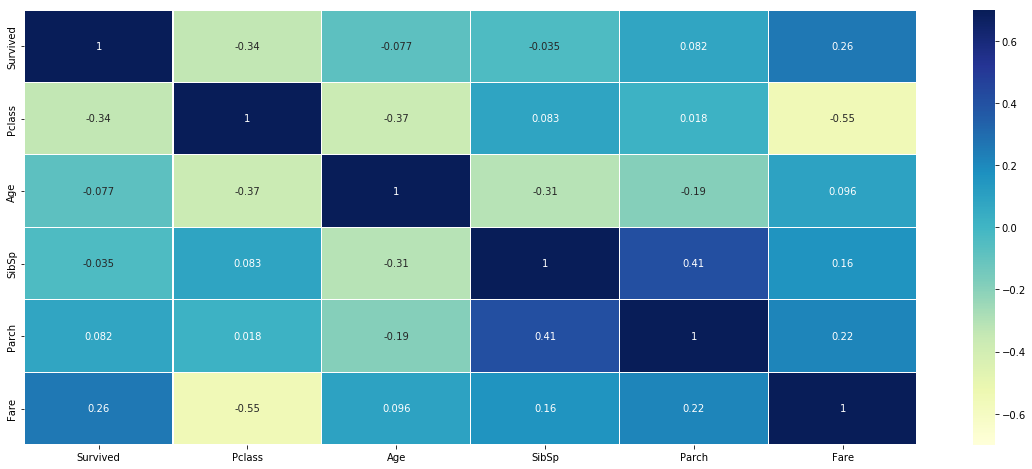

In [17]:
## corr matrix
corr=df1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

1. Survived and fare are mild positively correalated.
2. Survival and pclass are mild negatively correlated.

In [18]:
## checking values of the Pclass
df1['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

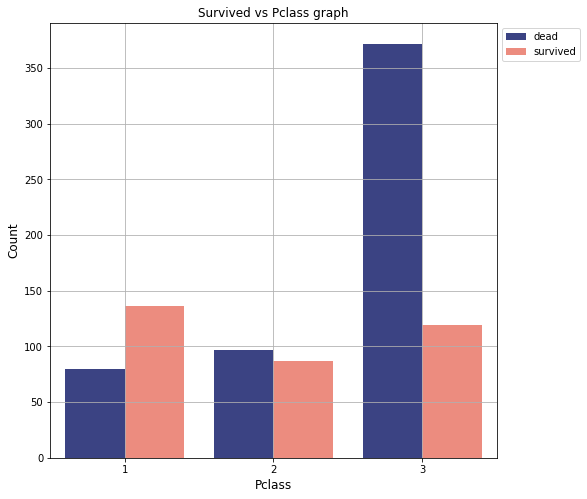

In [19]:
## Survived vs Pclass graph
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df1,palette=['#2F3A8F','#FE7E6D'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['dead','survived'],bbox_to_anchor=(1,1))
plt.xlabel("Pclass",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title('Survived vs Pclass graph',fontsize=12)
plt.grid()

1. Most of the people of third class seated people died.
2. About more than half of the first class seated people were saved.
3. This means that those who paid more were saved, this explains the mild positive correlation between Survived and Fare.

In [20]:
c=df1['Pclass'][(df1['Survived']==1) & (df1['Pclass']==1)].count()
print("About",round((136/216)*100,2),"% of the first class people were saved")

About 62.96 % of the first class people were saved


In [21]:
## checking Parch values
df1['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
## checking SibSp values
df1['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
## checking Embarked values
df1['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

1. There are 2 Null values in it. 
2. Most people got onboard from "S", which indicate it might be the biggest city of them all or the starting point of the ship.

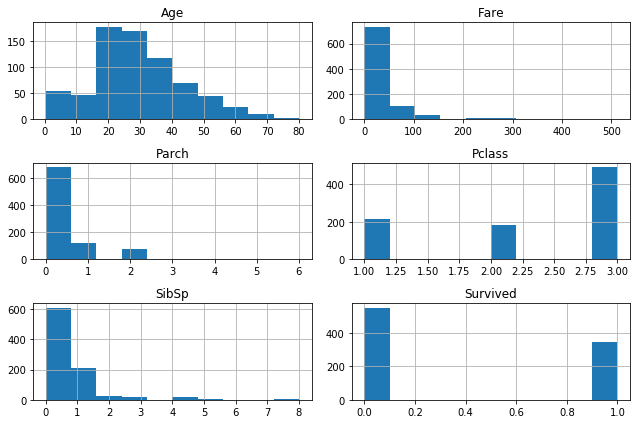

In [24]:
## freq distribution graph
freqgraph=df1.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

#### 4. Fill in all the missing values present in all the columns in the dataset.

In [25]:
## filling missing values in age
## Null values in Age are filled using the average of the Age column.
df1['Age']=df1['Age'].fillna(df1['Age'].median())

In [26]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
## filling missing values in Embarked
## Since Embarked is categorical, the most common one is taken to fill the null values.
df1['Embarked']=df1['Embarked'].fillna(df1['Embarked'].value_counts().index[0])

In [28]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [29]:
## unique values in Cabin
df1['Cabin'].nunique()

147

In [30]:
## null count in Cabin
df1['Cabin'].isnull().sum()

687

In [31]:
print("Percentage of NULL value in Cabin :",(687/891)*100)

Percentage of NULL value in Cabin : 77.10437710437711


#### We can either drop the column or assign or Null values to another variable

In [32]:
## Convert all Null values to another group "Unknown"
df1['Cabin']=df1['Cabin'].fillna('Unknown')

In [33]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### 5. Check and handle outliers in at least 3 columns in the dataset.

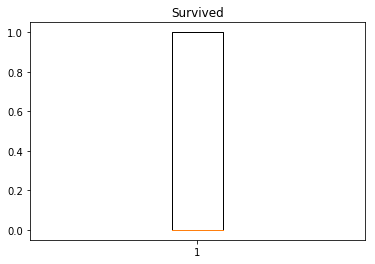

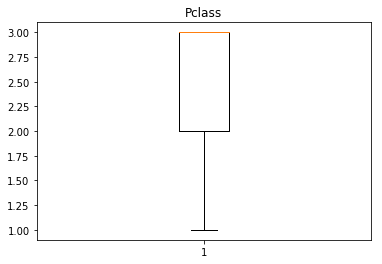

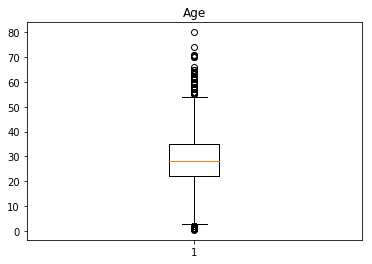

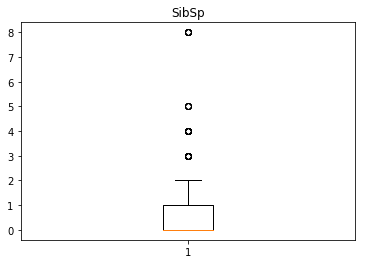

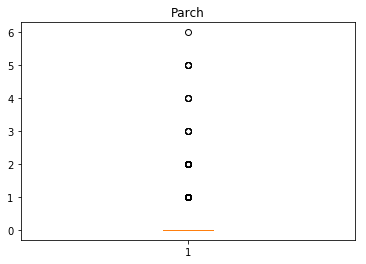

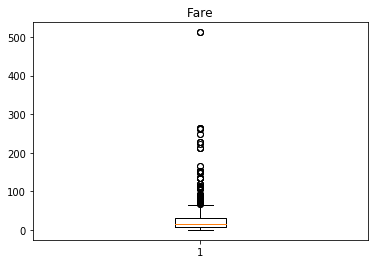

In [34]:
## checking outliers
for i in ['Survived','Pclass', 'Age',
       'SibSp','Parch','Fare']:
    plt.title(i)
    plt.boxplot(df1[i])
    plt.show()  

##### outliers present in 'Age','SibSp','Parch','Fare'.

In [35]:
df2=df1

In [36]:
## handling outliers in age
q1 = np.percentile(df2['Age'],25,interpolation='midpoint')
q3 = np.percentile(df2['Age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['Age'][(df2['Age']<low_limit)|(df2['Age']>high_limit)].index
df2.drop(index,inplace=True)

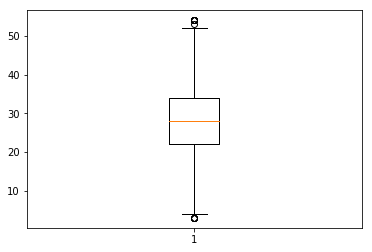

In [37]:
plt.boxplot(df1['Age'])
plt.show() 

In [38]:
## handling outliers in fare
q1 = np.percentile(df2['Fare'],25,interpolation='midpoint')
q3 = np.percentile(df2['Fare'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['Fare'][(df2['Fare']<low_limit)|(df2['Fare']>high_limit)].index
df2.drop(index,inplace=True)

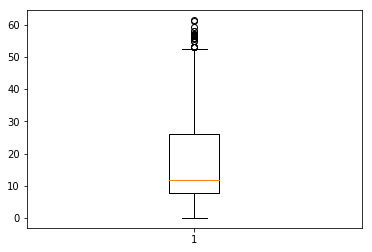

In [39]:
plt.boxplot(df1['Fare'])
plt.show() 

In [40]:
## handling outliers in SibSp
q1 = np.percentile(df2['SibSp'],25,interpolation='midpoint')
q3 = np.percentile(df2['SibSp'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['SibSp'][(df2['SibSp']<low_limit)|(df2['SibSp']>high_limit)].index
df2.drop(index,inplace=True)

In [41]:
df2['SibSp'][(df2['SibSp']<low_limit)|(df2['SibSp']>high_limit)].index

Int64Index([], dtype='int64', name='PassengerId')

In [42]:
df2['SibSp'].value_counts()

0    519
1    152
2     18
Name: SibSp, dtype: int64

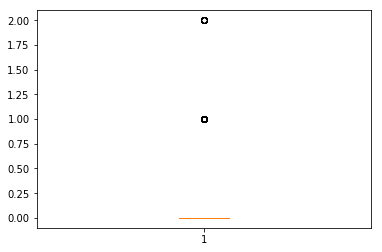

In [43]:
plt.boxplot(df1['SibSp'])
plt.show() 

In [44]:
len(df2)

689

In [45]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.545220,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


In [46]:
## unique values in 'Ticket'
df2['Ticket'].nunique()

596

In [47]:
## dropping irrelavant columns
df2.drop(['Name','SibSp','Ticket','Cabin'],axis=1,inplace=True)

In [48]:
df2.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [49]:
## one hot encoding
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked'])

In [50]:
df2.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,7.9250,1,0,0,0,1
4,1,1,35.0,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,8.4583,0,1,0,1,0


#### 6. Do min max scaling on the feature set (Take ‘Survived’ as target) 

In [51]:
x=df2.drop('Survived',axis=1)

In [52]:
x.describe()

,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,28.711176,0.269956,16.631246,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.723586,9.545220,0.754625,13.092563,0.463665,0.463665,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
x=pd.DataFrame(x)

In [55]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.504141,0.044993,0.270959,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.361793,0.187161,0.125771,0.213306,0.463665,0.463665,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.000000,0.171068,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.000000,0.382051,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
